In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

## He I 10830

<AxesSubplot:>

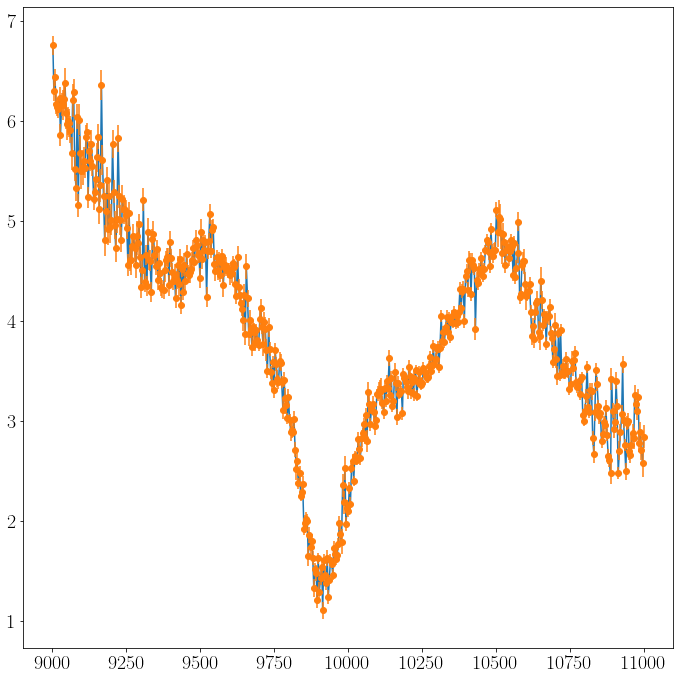

In [3]:
Spec1.plot_line_region(9000, 11000)

## He hvf + Fe II pvf

### Single Fe II line (10500)

In [85]:
Spec1.add_line('HeI_10830/FeII1',
               9450,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII1'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                  -8000, 14, -2000))

LS estimation:
Velocity 1: -26301 km/s
Velocity 2: -7771 km/s


Normalize factor = 2.295


100%|███████████████████████████████████████| 2000/2000 [00:22<00:00, 88.33it/s]


MCMC results:
Velocity 1: -26299 pm 53 km/s
Velocity 2: -7772 pm 116 km/s
Normalize factor = 2.295


  8%|███                                   | 4000/50000 [00:44<08:31, 90.00it/s]

MCMC results:
Velocity 1: -26311 pm 53 km/s
Velocity 2: -7789 pm 120 km/s


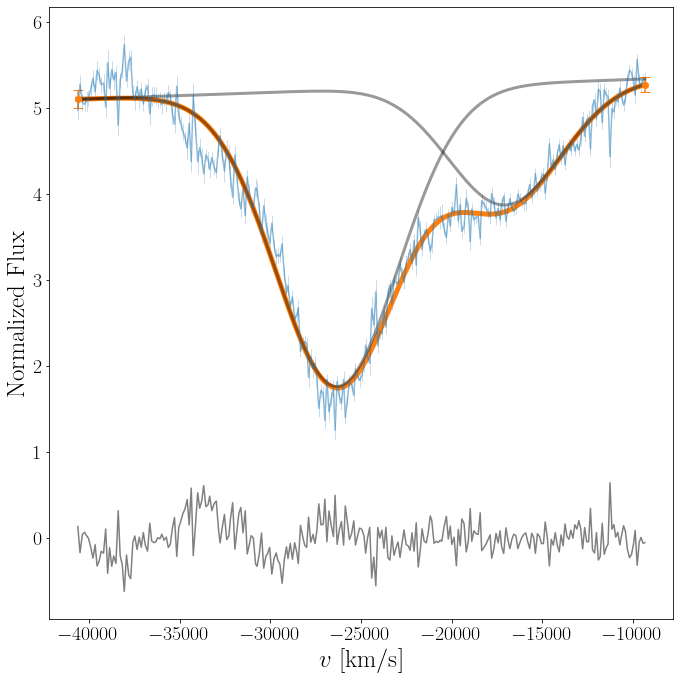

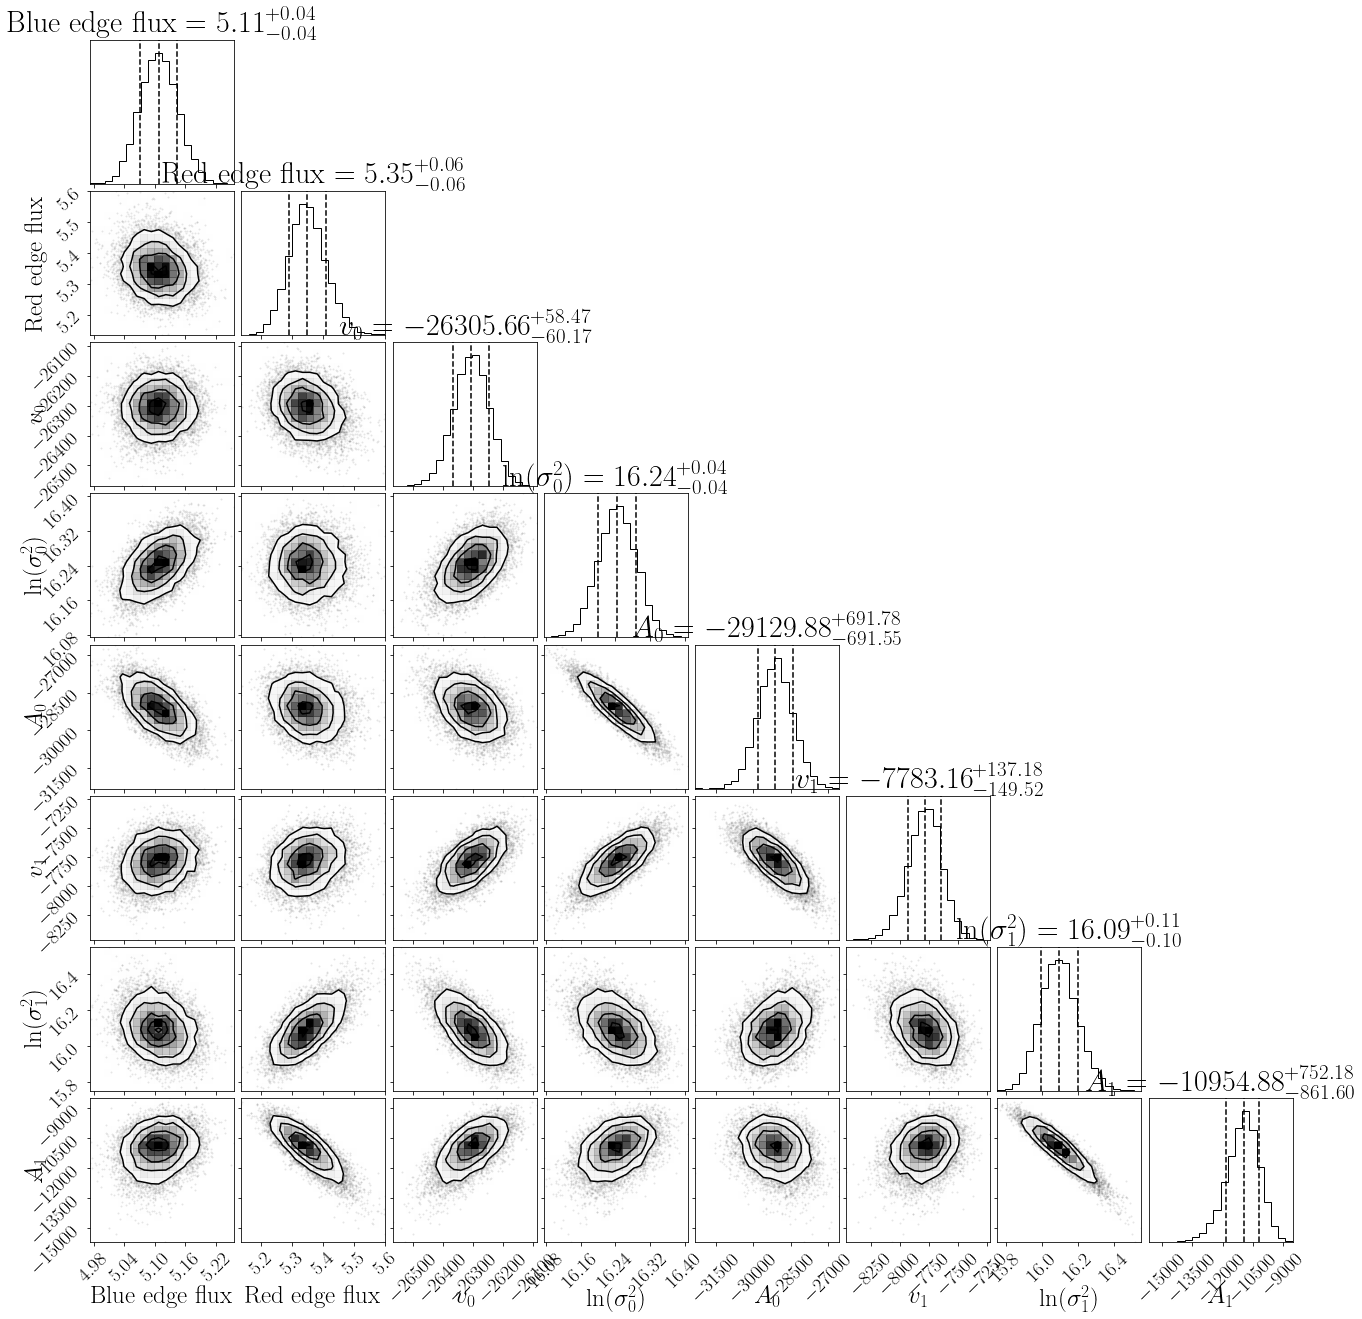

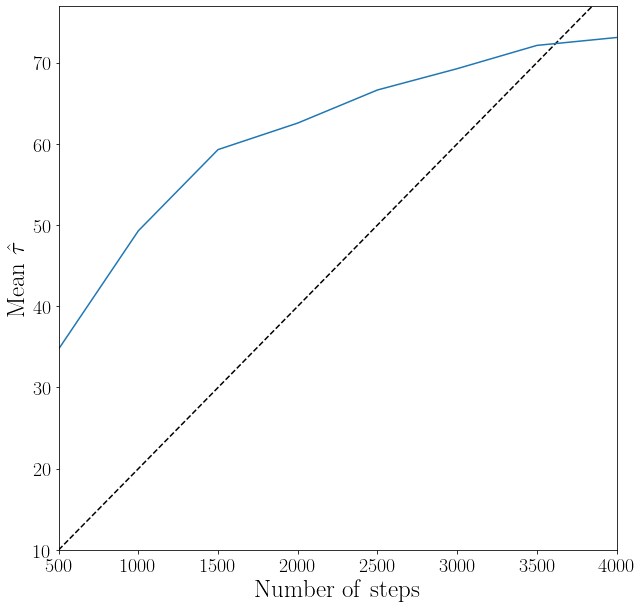

In [86]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII1'].theta_LS,#[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=2000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII1'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Two Fe II lines

In [87]:
Spec1.add_line('HeI_10830/FeII2',
               9450,
               10500,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[], [.5, 1]],
               free_rel_strength=[False, True])
               #rel_strength=[[], [0.832, 0.521]])
Spec1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

LS estimation:
Velocity 1: -15789 km/s
Velocity 2: -17354 km/s


Normalize factor = 2.907


100%|███████████████████████████████████████| 5000/5000 [01:04<00:00, 78.05it/s]

MCMC results:
Velocity 1: -26115 pm 72 km/s
Velocity 2: -8330 pm 145 km/s


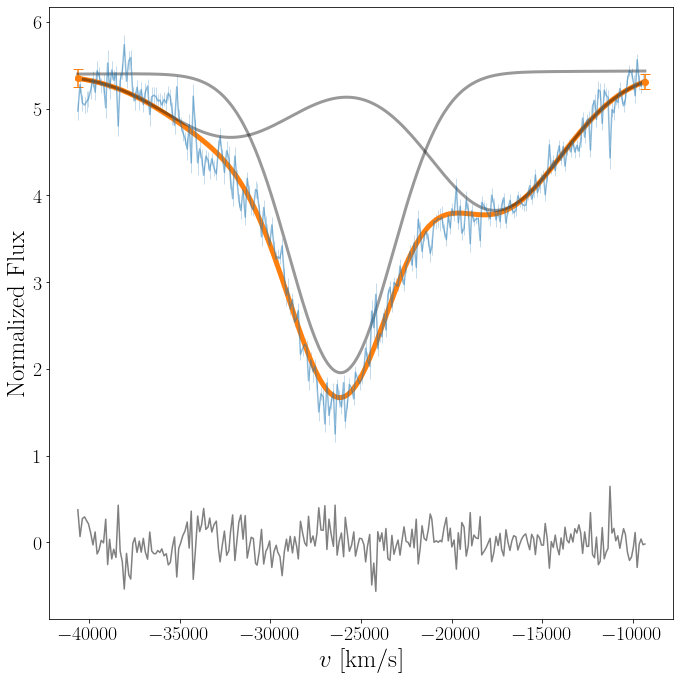

Normalize factor = 1.960


 11%|████▏                                 | 5500/50000 [01:08<09:10, 80.83it/s]

MCMC results:
Velocity 1: -26138 pm 50 km/s
Velocity 2: -8418 pm 111 km/s


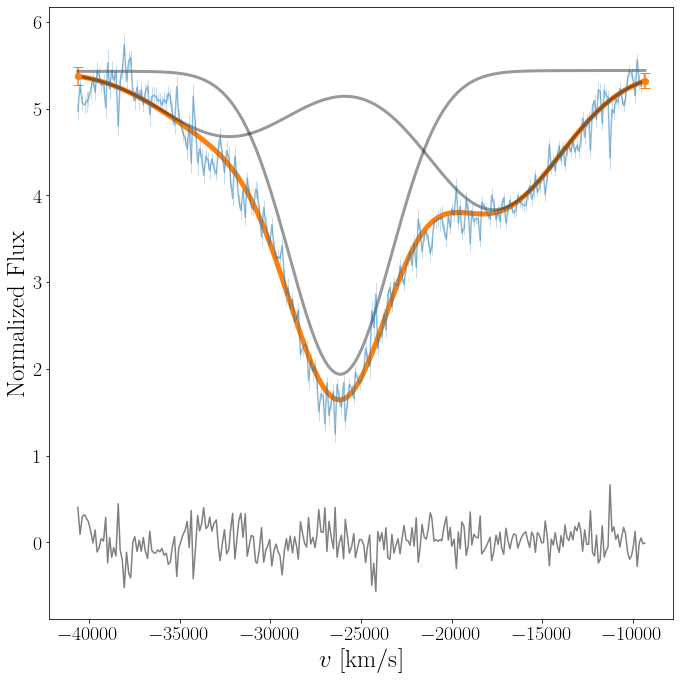

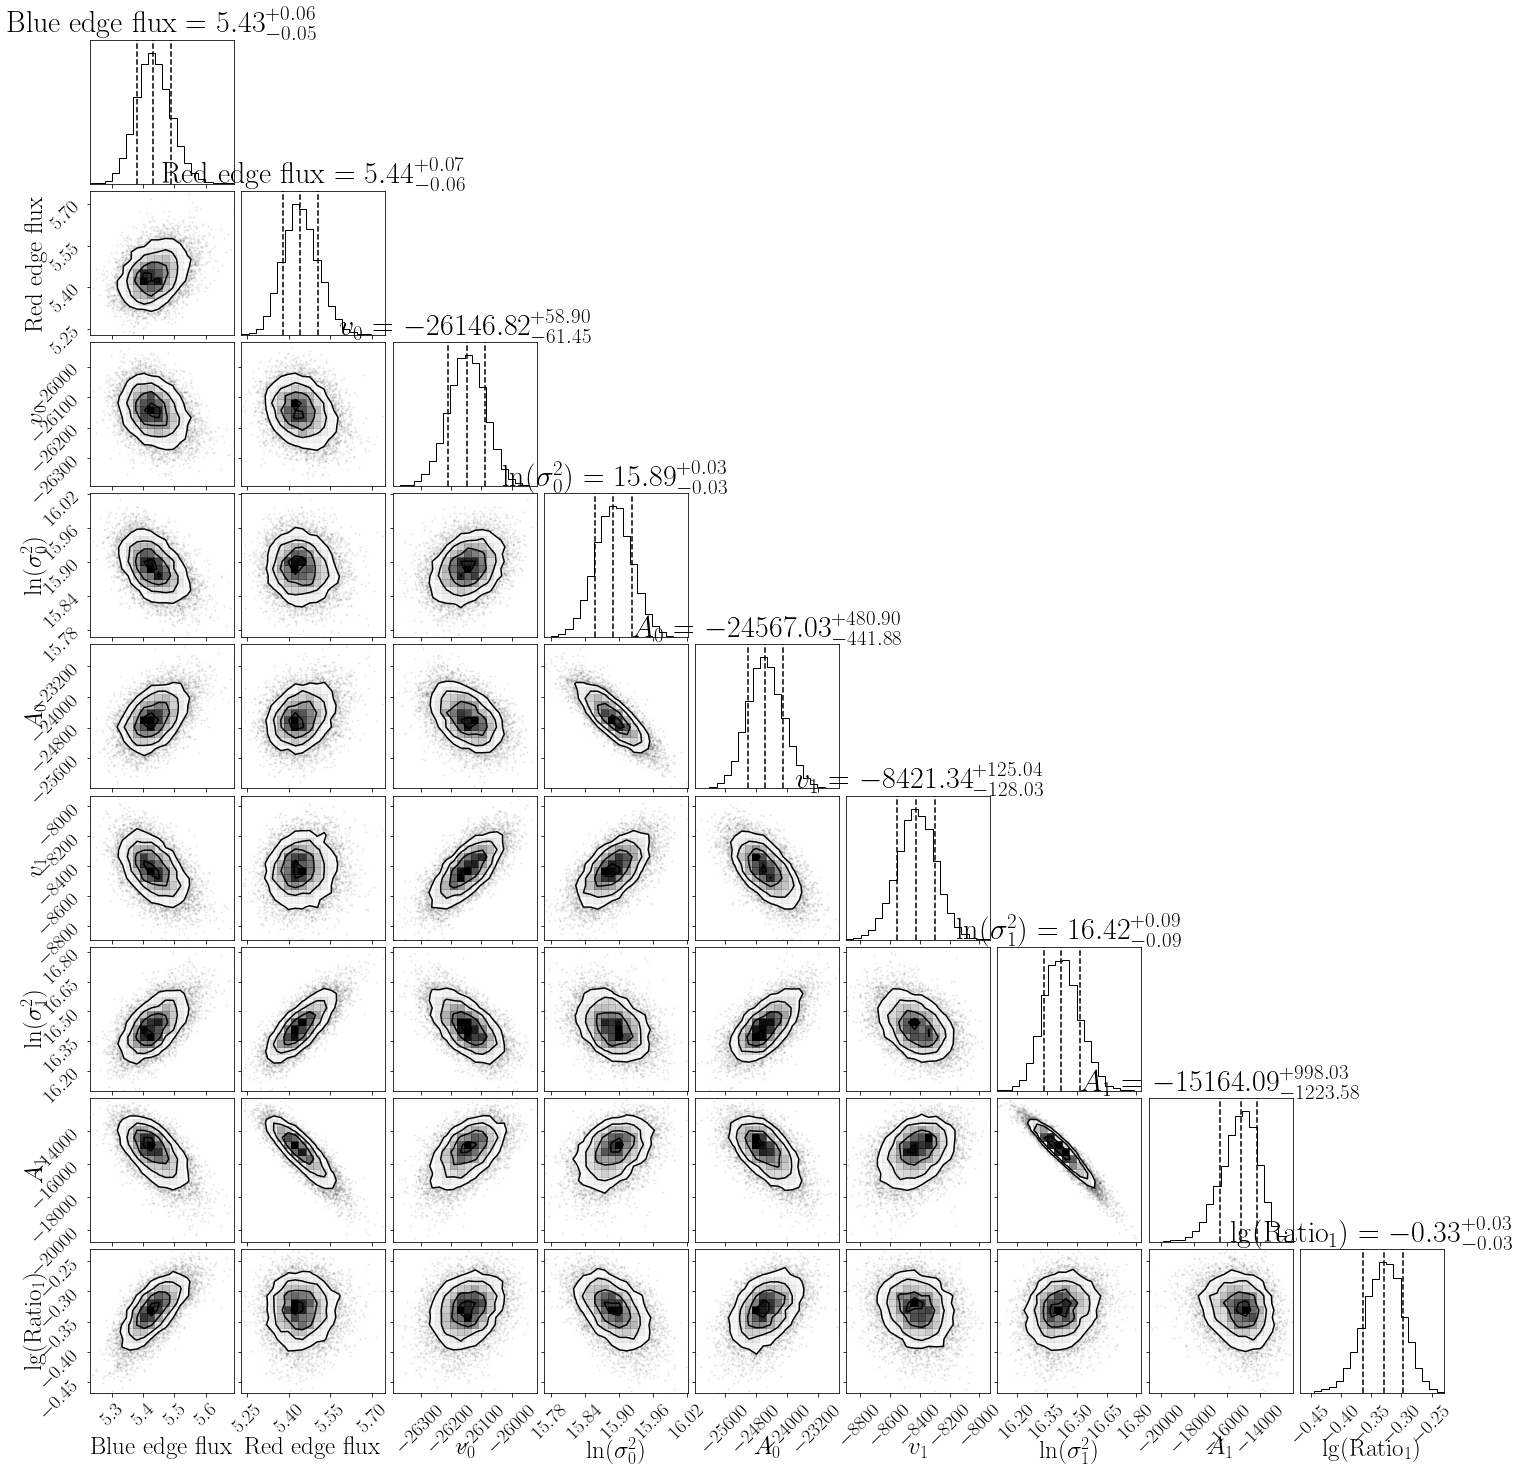

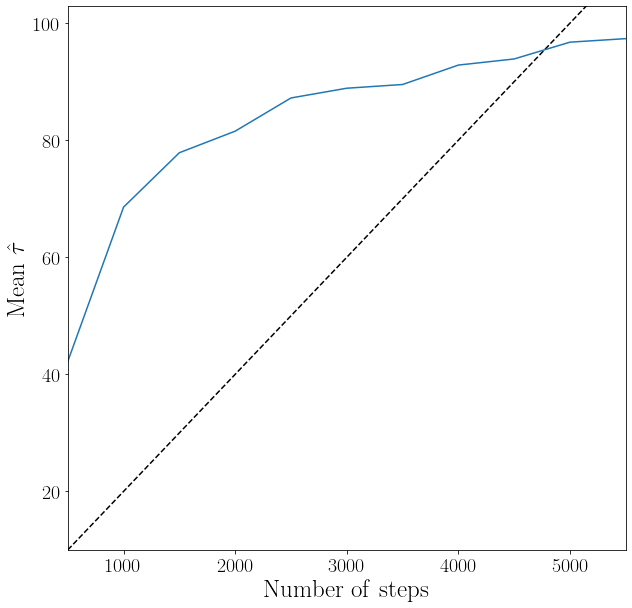

In [88]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e5],
    var_max=1e10,
    initial=[5, 5, -28000, 15, -2000, -8000, 14, -2000],
    normalize_unc='LS',
    max_nsteps=5000,
    Plot_model=True)
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC[:8],
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Three Fe II lines

In [ ]:
Spec1.add_line('HeI_10830/FeII3',
               9300,
               10600,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [1, 1.5, 1]])
               #rel_strength=[[], [0.832, 0.521, 0.374]])

In [ ]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc='LS',
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII3'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

In [ ]:
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

In [ ]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## C I 10693

In [8]:
vel.velocity_rf_line(10830, 10693, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-22354.531100244476

## Mg II 10927

In [9]:
vel.velocity_rf_line(10830, 10927, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-28796.789504374843

## He I 20581

(0.0, 1.5)

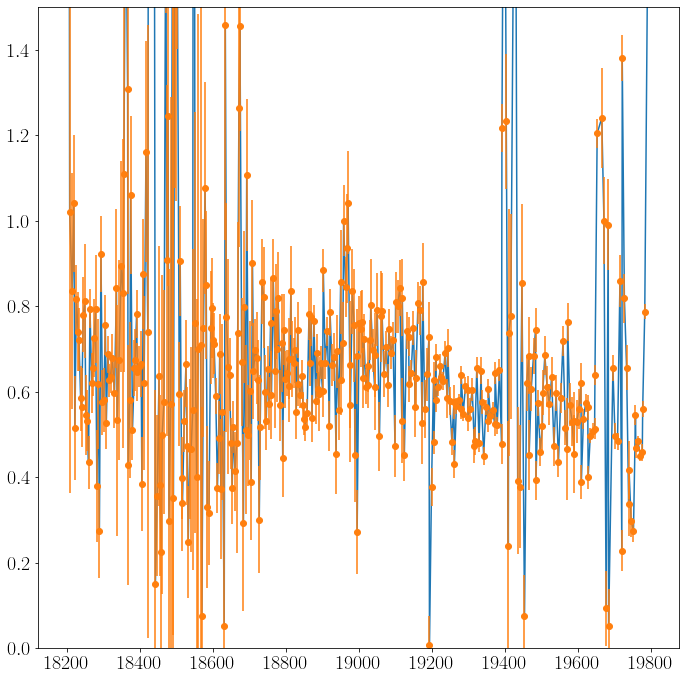

In [90]:
ax = Spec1.plot_line_region(18200, 19800)
ax.set_ylim(0, 1.5)

array([ 7.31074597e-01,  7.81923825e-01, -2.61375194e+04,  1.58874626e+01,
       -4.93969451e+02])

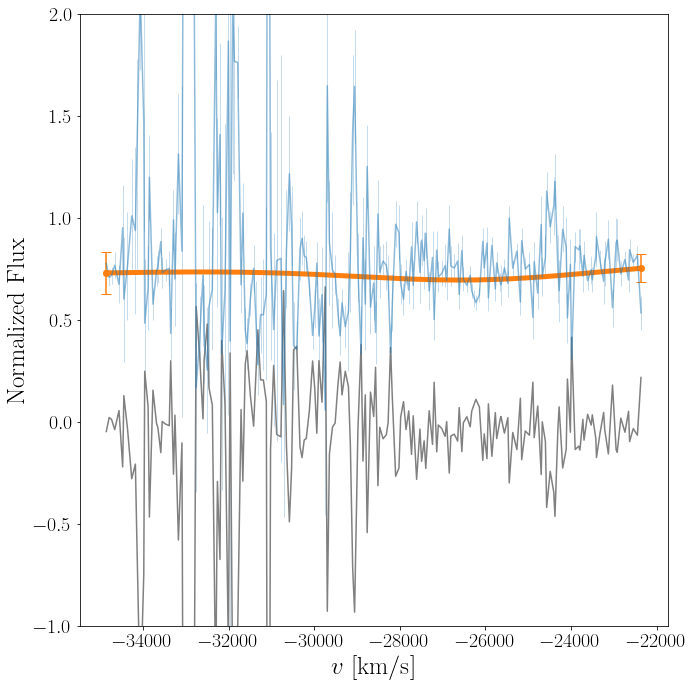

In [93]:
Spec1.add_line('HeI_20581', 18310, 19100, lines=[[20581]], rel_strength=[[1]])
theta_He2 = np.append(Spec1.line['HeI_20581'].blue_fl[0], Spec1.line['HeI_20581'].red_fl[0])
theta_He2 = np.append(theta_He2, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
theta_He2[-1] *= 2e-2
ax = Spec1.line['HeI_20581'].plot_model(theta_He2, return_ax=True)
ax.set_ylim(-1, 2)
theta_He2

(array([ 1., 19., 29., 23., 38., 19., 25., 42., 37., 26., 38., 21., 54.,
        32., 35., 27., 19.,  5.,  6.,  4.]),
 array([-0.0078  , -0.005595, -0.00339 , -0.001185,  0.00102 ,  0.003225,
         0.00543 ,  0.007635,  0.00984 ,  0.012045,  0.01425 ,  0.016455,
         0.01866 ,  0.020865,  0.02307 ,  0.025275,  0.02748 ,  0.029685,
         0.03189 ,  0.034095,  0.0363  ]),
 [<matplotlib.patches.Polygon at 0x7f84707c7700>])

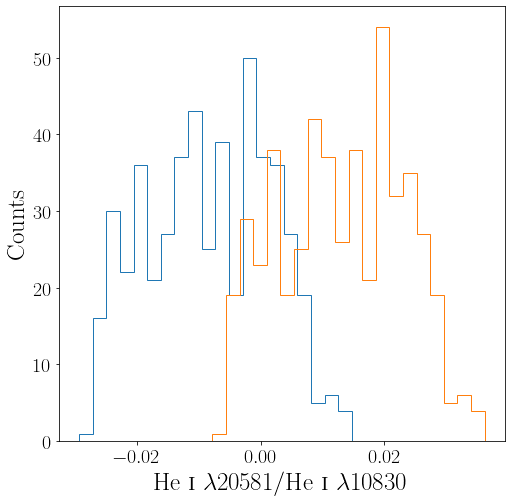

In [94]:
import matplotlib.pyplot as plt

red = np.random.rand(500) * 100 + 19100 # 19100-19200
blue = np.random.rand(500) * 400 + 18300 # 18300-18400

Ratio = []
Ratio_5sigma = []
for k in range(500):
    Spec1.add_line('HeI_20581', blue[k], red[k], lines=[[20581]], rel_strength=[[1]])
    He2 = Spec1.line['HeI_20581']
    Chi2_He2 = []
    ratio = np.linspace(-.05, .1, 1501)
    theta_He2 = np.append(Spec1.line['HeI_20581'].red_fl[0],
                          Spec1.line['HeI_20581'].blue_fl[0])
    theta_He2 = np.append(theta_He2,
                              Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
    for r in ratio:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * r
        chi2 = vel.neg_lnlike_gaussian_abs(theta, He2.rel_strength,
                                           He2.lambda_0, He2.blue_vel, He2.red_vel,
                                           He2.vel_rf, He2.norm_fl, He2.lines,
                                           He2.norm_fl_unc, 'chi2',
                                           He2.free_rel_strength) / 1.95**2
        Chi2_He2 = np.append(Chi2_He2, chi2)
    #Chi2_He2 = Chi2_He2
    ratio = ratio[Chi2_He2 - Chi2_He2.min() < 25]
    Chi2_He2 = Chi2_He2[Chi2_He2 - Chi2_He2.min() < 25]
    if Chi2_He2.min()/len(Chi2_He2) > 5:
        continue
    Ratio.append(ratio[np.argmin(Chi2_He2)])
    Ratio_5sigma.append(ratio[-1])
    r = ratio[np.argmin(Chi2_He2)]
    if r > 0.04:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * r
        ax = Spec1.line['HeI_20581'].plot_model(theta, return_ax=True)
        ax.set_ylim(-1, 2)
        plt.show()

plt.figure(figsize=(8, 8))
plt.xlabel(
    r'$\mathrm{He}\ \textsc{i}\ \lambda 20581/\mathrm{He}\ \textsc{i}\ \lambda 10830$'
)
plt.ylabel(r'$\mathrm{Counts}$')
plt.hist(Ratio, histtype='step', bins=20)
plt.hist(Ratio_5sigma, histtype='step', bins=20)